In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats  # 과학용 계산 라이브러리

import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras



In [4]:
file_path = 'C://Users//Chick//AI-class//diabetes.csv'  
df = pd.read_csv(file_path)

In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df = df.drop('Outcome', axis=1)

In [7]:
X = df.drop('BMI', axis=1)
y = df['BMI']

In [8]:
Y = pd.get_dummies(y).values

In [9]:
X = X.values


In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0) 


In [21]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape, 


((614, 7), (614, 248), (154, 7), (154, 248))

In [28]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(8,input_shape=(7,),activation='relu'))
model.add(Dense(30,activation='relu'))
model.add(Dense(30,activation='relu'))
model.add(Dense(1))

model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mse'])

model.summary()


C:\Users\Chick\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 8)                   │              64 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 30)                  │             270 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 30)                  │             930 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              31 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,295 (5.06 KB)

 Trainable params: 1,295 (5.06 KB)

 Non-trainable params: 0 (0.00 B)

In [30]:
N_EPOCHS = 10

history=model.fit(x=X_train, y=y_train, epochs=N_EPOCHS, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)


Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 4.2671 - mse: 4.2671 - val_loss: 1.5897 - val_mse: 1.5897
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.8719 - mse: 0.8719 - val_loss: 0.2248 - val_mse: 0.2248
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.6187 - mse: 0.6187 - val_loss: 0.1662 - val_mse: 0.1662
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.5031 - mse: 0.5031 - val_loss: 4.0342 - val_mse: 4.0342
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.9390 - mse: 0.9390 - val_loss: 0.7754 - val_mse: 0.7754
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.8039 - mse: 0.8039 - val_loss: 0.5792 - val_mse: 0.5792
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.3513 - mse: 0.3513 - val_loss: 0.2355 - val_mse: 0.2355
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.3911 - mse: 0.3911 - val_loss: 0.0569 - val_mse: 0.0569
Epoch 9/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.312

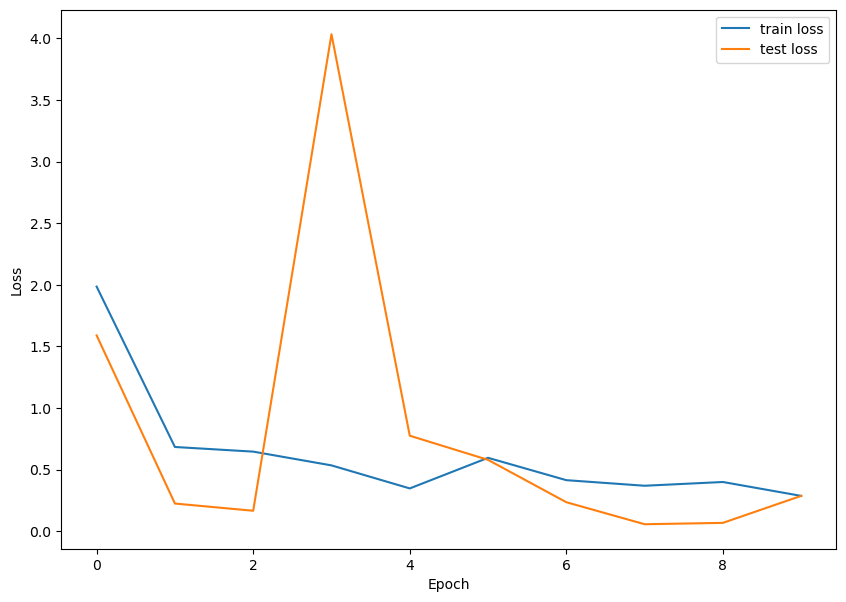

In [32]:
# loss 체크
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['loss'], label='train loss')
plt.plot(range(N_EPOCHS), history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [34]:
model.evaluate(X_test, y_test)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.3035 - mse: 0.3035


[0.2869272232055664, 0.2869272232055664]

In [24]:
# 데이터 스케일링 (KNN은 거리 기반 알고리즘이므로 특징 스케일링이 중요)
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)